# Lecture 22 2018-11-01: Matplotlib

Plotting data with matplotlib package

In [1]:
import pandas as pd
from pandas import Series, DataFrame   # use these so often, this can be helpful

## Miscelaneous stuff

### Writing DataFrames to a file
The *to_csv('filename')* method in a pandas DataFrame writes that DataFrame to an external file named 'filename'. (similarly, *to_excel()* writes to an excel formatter file, *to_html* to an html file, and so on.)

Useful parameters include:

Parameter | default | meaning
:-------- | :------ | :----------
sep       | ','     | string that separates columns. use '\t' to create tab delimited files
columns   | all     | list of columns to write to output
header    | True    | whether to include a header line


In [2]:
# output a (dumb) tab delimited file

test_df=DataFrame( 
   [  ['w1','d1',1,10, 99, 66],
      ['w1','d3',2,20, 99, 66],
      ['w2','d1',3,30, 99, 66],
      ['w2','d2',4,40, 99, 66],
      ['w2','d2',5,60, 99, 66],
      ], 
    columns=['week','day','v1','v2', 'dumb_column', 'dumber_column'],
    index=['zero', 'one', 'two', 'three', 'four']
   )

test_df

,week,day,v1,v2,dumb_column,dumber_column
zero,w1,d1,1,10,99,66
one,w1,d3,2,20,99,66
two,w2,d1,3,30,99,66
three,w2,d2,4,40,99,66
four,w2,d2,5,60,99,66


In [3]:
test_df.to_csv('test_file.txt',
               sep='\t',
               columns=['week','day','v1','v2',]
              )

In [4]:
!cat test_file.txt

	week	day	v1	v2
zero	w1	d1	1	10
one	w1	d3	2	20
two	w2	d1	3	30
three	w2	d2	4	40
four	w2	d2	5	60


### dropping columns in a DataFrame in old versions of Pandas/Python

the *DataFrame.drop()* method has signature


>def drop(columns=None, axis=0)

So the first parameter is the value for *columns*, either a single column name or a list of column names, and the second is the axis if present. In both cases, the parameter name ("columns" and "axis") is optional. So these are equivalent:

'''
test_df.drop(columns='dumb_column', axis=1)
test_df.drop(columns=['dumb_column'], axis=1)
test_df.drop(columns='dumb_column')             # use of 'columns=' implies 'axis=1'
test_df.drop(columns=['dumb_column'])           # use of 'columns=' implies 'axis=1'
test_df.drop('dumb_column', axis=1)
test_df.drop('dumb_column', 1)
'''

I prefer to use parameter names so that the reader doesn't have to remember which positional parameter is for what item, and avoid redundancies ('column' implies 'axis=1'). So, my preference above is:

>test_df.drop(columns='dumb_column')



**in older versions of pandas** the drop method has different parameters and defaults. The first parameter is *labels=* and there is no *columns=*. The default axis is 0.

So, what in a newer version would be

>test_df.drop(columns=['dumb_column', 'dumber_column'], inplace=True)

in an older version of pandas would be

>test_df.drop(['dumb_column', 'dumber_column'], axis=1, inplace=True)

In [5]:
x = test_df.drop(columns=['dumb_column', 'dumber_column'])
x

,week,day,v1,v2
zero,w1,d1,1,10
one,w1,d3,2,20
two,w2,d1,3,30
three,w2,d2,4,40
four,w2,d2,5,60


## Matplotlib

matplotlib is a (very) large package for creating figures and plots. 

See examples

>https://matplotlib.org/gallery/index.html

Matplotlib is designed to produce graphics which are many different kinds of objects, nested inside one another.

Objects include figures, subplots, axes, points, lines, legends, text, and more. 
Some of these objects are created from data, such as DataFrames. 
For example, the subplot's *plot()* method can create several *line* objects, one for each column.

Each object has values for style-related values, such as fonts, colors, widths, labels, and more. 
These can be set when the object is created, or by methods in the object. 

The strength of matplotlib is this great flexibility. The weakness is this complexity: you have to know which object controls the feature you want to manipulate. 

We will begin with the *plot()* method to produce line plots, to explore how to create graphics and manipulate style related values. 

*Technical note:* Matplotlib calls a "backend" program to create an actual graphic from your matplotlib methods. In jupyter notebook, you probably want the graphics to appear "inline", that is, in a cell. But jupyter resets graphics when you change cells. 

So, you need to put all your matplotlib commands in a single cell. This is annoying when interactively creating graphics. I hope someday jupyter fixes this. (I haven't tried jupyter lab, which may fix it.)

In [6]:
from matplotlib import pyplot as plt

%matplotlib inline

### figures and subplots

A *figure* object contains everything created by matplotlib.

Each part of the figure is a separate object: axes, lines, legends, and so on.

*figure* objects contain one or more *AxesSubplot* objects, which most people refer to as *subplots*, to enable multiple plots on one figure. Two ways to set them up:

1. create the figure with *plt.figure()*, then add subplots to the figure object with that figure's *add_subplot()* method. To add subplots laid out in an x by y matrix, and to use the zth one (counting from one for some strange reason): 

>fig.add_subplot(x,y,z)

2. (Recommended) use the *subplots(x,y)* method in *matplotlib.pyplot*, which we importated as *plt*, to create a figure with *x* rows and *y* columns of subplots, returning a tuple with the figure object and a list of the subplots objects.

It used to be the case that creating a figure *does not* display it. In this case, *show()* method in that figure. This makes it easy to build up figures incrementally without having to redraw the figure at each step.

The *figsize=(x,y)* parameter changes the size of your figure. x and y are "inches", which are defined indirectly by the dpi parrameter (dots per inch). 

In [7]:
import numpy as np
from numpy.random import randn as randn

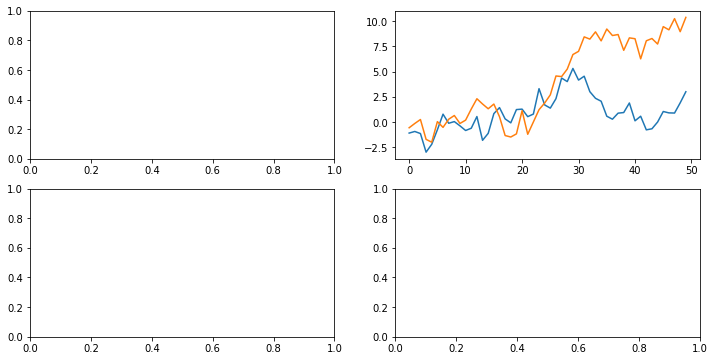

In [8]:
fig, axes = plt.subplots(2,2, figsize=(12,6))    # with just one subplot, axes is an Axes, not a list. 

this_axis = axes[0,1]
line_one = this_axis.plot(randn(50).cumsum())   # returns a line object
line_two = this_axis.plot(randn(50).cumsum())

#fig.show()

In [9]:
this_axis

In [10]:
line_one

In [11]:
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110368d68>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11572b080>]], dtype=object)

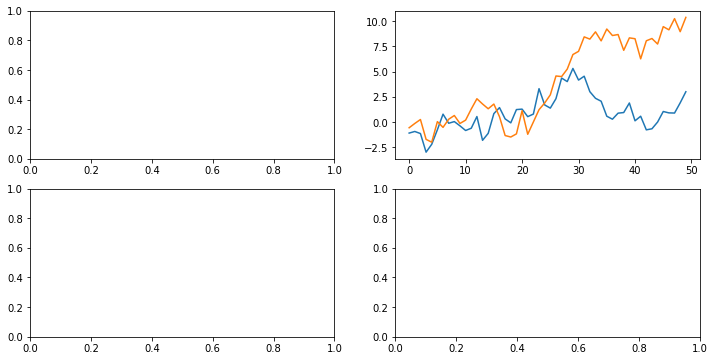

In [12]:
fig

### Subplots

Introspect into an subplot object to see all the methods and parameters. 
There are different methods for different types of plot, and many parameters.

In [98]:
plt.subplots?

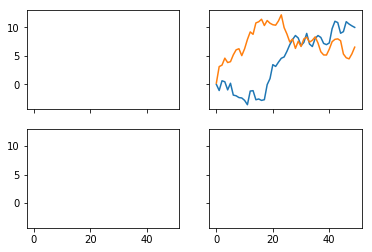

In [13]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)

this_axis = axes[0,1]
line_one = this_axis.plot(randn(50).cumsum())   # returns a line object
line_two = this_axis.plot(randn(50).cumsum())

#fig.show()

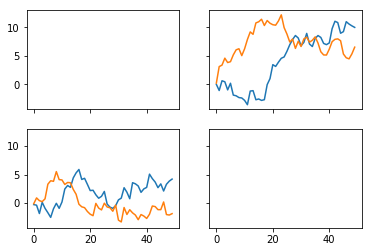

In [14]:
this_axis = axes[1,0]   # change to another axis

line_one = this_axis.plot(randn(50).cumsum())
line_two = this_axis.plot(randn(50).cumsum())

fig

one can tweak various parameters to change how axes look using *get_* and *set_* methods in the axis object.
*get_* gets the value(s) of a paramter, and *set_* sets the values of the same parameters. 

We show examples of this below. 


In [ ]:
this_axis.get
#this_axis.set

#### plotting data in a subplot
There are many methods that draw in axes. Various kinds of plot methods plot data, hline draws a line, and so on. 

*plot()* is one of several method that draw data in an axis. 

*plot()* produces line objects from the data and places them in an axis, for example

Plotting methods produce objects of the appropriate type. For example, plot() and hline() create lines, hist() returns a description of rectangles, etc.

Each of these object has methods and properties (such as color, style, etc.)
To change parameters of any matplot lib object (figures, subplots, lines, text, ticks, labels, etc.), look for the right *set_parameter* method.

We focus on *plot()* for now.

In [16]:
#this_axis.plot?
#this_axis.hist?
#this_axis.scatter?
#this_axis.bar?

##### Setting style parameters

This can be done by accessing relevant *get_* and *set_* methods, or by specifying parameters when the object is created. 

We show this with line objects here, but the same techniques work with most matplotlib objects. 

**WARNING WARNING WARNING***

Never *ever*, *ever*, *ever* tryto set a value with an assignment. The correct syntax is always:

>set_parameter(value)

*never* *never* *never*

>set_parameter = value

This last changes the *method* 'set_parameter' into an alias for the object named 'value'. 
This is hard to detect and harder to fix (I usually end up stopping the kernel and starting over)

In [17]:
this_line = line_one[0]   # easier to use line object than a list with just one line object
that_line = line_two[0]

old color of this_line is #1f77b4


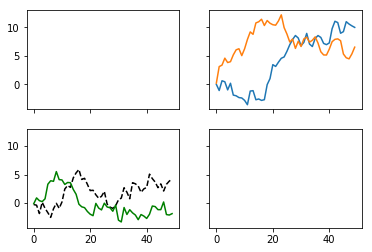

In [18]:
print('old color of this_line is', this_line.get_color())
this_line.set_color('k') # or 'black'
this_line.set_linestyle('--')
that_line.set_color('green') # or 'g'

#fig.show()
fig

In [19]:
this_line.set_linestyle?

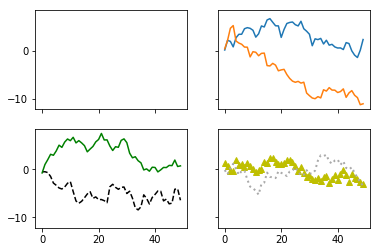

In [18]:
this_axis = axes[1,1]   # change to another axis

_ = this_axis.plot(randn(50).cumsum(), 'y^')
_ = this_axis.plot(randn(50).cumsum(), 
    color='darkgray', 
    label='LINE ONE', 
    linewidth=2,
    linestyle=':', 
    )

fig

In [20]:
#this_axis.plot?
#plt.Line2D?

One can adjust style parameters for the figure object (and everything it contains, all subplots). 
It is particularly useful to adjust spacing around subplots, with the *subplots_adjust()* method in the figure object (this is also available directly from matplotlib, see the book.)

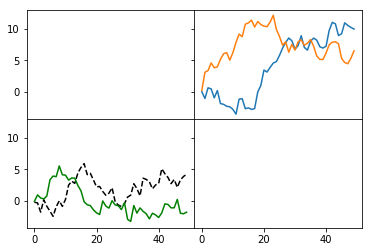

In [21]:
fig.subplots_adjust(wspace=0, hspace=0) # change figure width and height
fig